# Regression

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:>

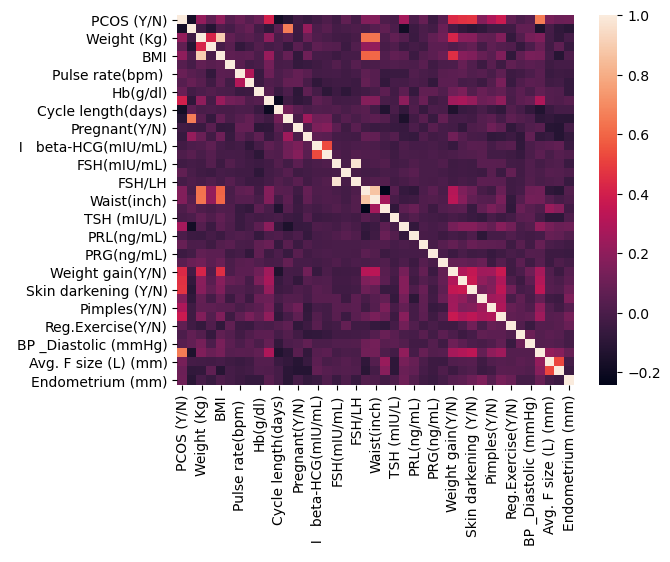

In [27]:
#reading dataset csv
dataset=pd.read_csv('PCOS_data_without_infertility1.csv')
dataset = dataset.drop('Sl. No', axis=1)
dataset = dataset.drop('Patient File No.', axis=1)
dataset = dataset.drop('Unnamed: 45', axis=1)
dataset = dataset.drop('Follicle No. (R)', axis=1)
dataset = dataset.drop('Follicle No. (L)', axis=1)
targetColumn = ["FollicleNumber"]
predictors = list(set(list(dataset.columns)) - set(targetColumn))

y=dataset['FollicleNumber']
X=dataset.loc[:,dataset.columns !="FollicleNumber"]

from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
x_train[x_train.isnull().any(axis=1)]

x_train.dropna(inplace=True)
y_train.drop(156, inplace=True) #inplace assigns to same

x_test.dropna(inplace=True)
y_test.drop(457, inplace=True)

#see heatmap for correlation 
sns.heatmap(dataset.corr( ), annot=False)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795.1040255931969, tolerance: 0.6608551724137931
  model = cd_fast.enet_coordinate_descent(


Training R2 for Lasso Regression Model:  0.4940929586696311
Testing R2 for Lasso Regression Model:  0.3823469393949649
RMSE for Training Data:  2.977952962486709
RMSE for Testing Data:  3.0925961092236443


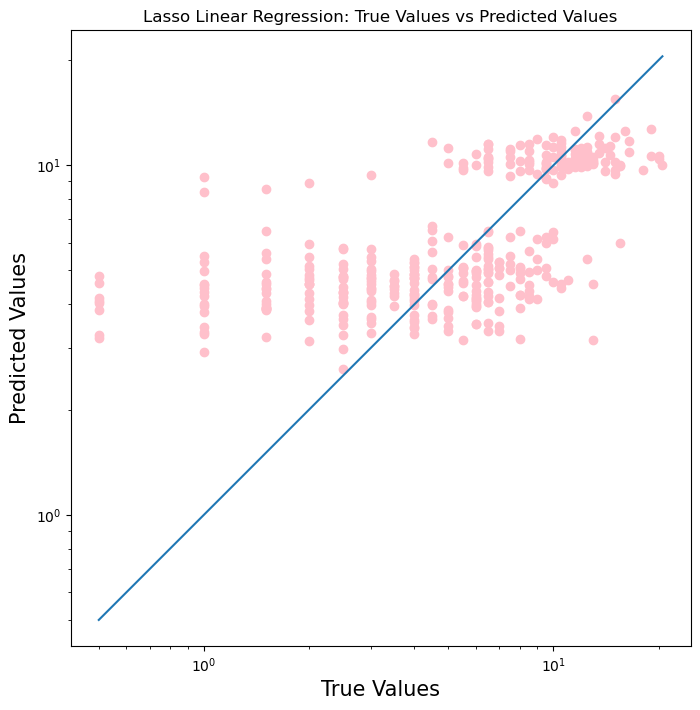

In [28]:
#Penalized model - Lasso
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt  

lm = linear_model.Lasso(alpha=0.01)
lm.fit(x_train, y_train)
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training R2 for Lasso Regression Model: ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Testing R2 for Lasso Regression Model: ", accuracy_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

true_val = y_train
pred_val = y_pred_train

plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='pink')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], '-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Lasso Linear Regression: True Values vs Predicted Values")
plt.axis('equal')
plt.show()


Training R2 for Bagged Trees Regression Model:  0.8991503694272833
Testing R2 for Bagged Trees Regression Model:  0.32617967352470734
RMSE for Training Data:  1.329595778305197
RMSE for Testing Data:  3.2301520068841407


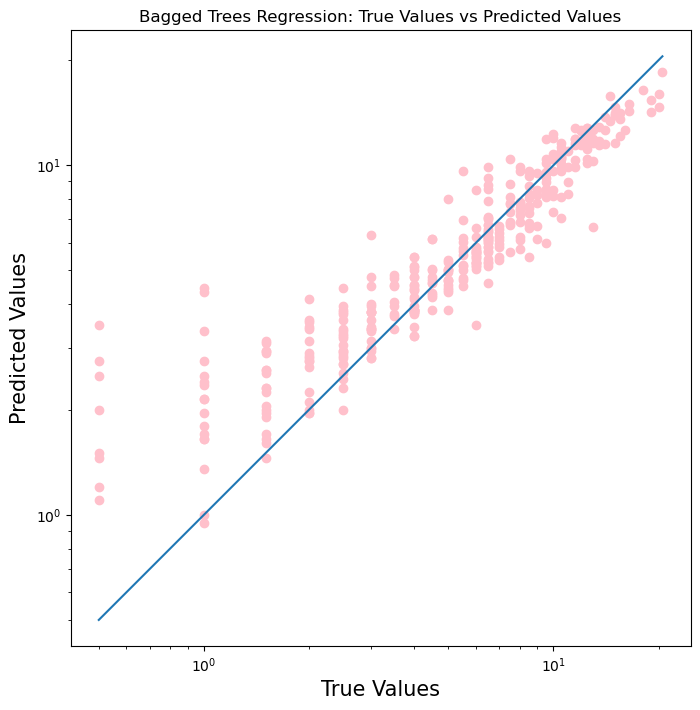

In [29]:
#Bagged Trees Regressor

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt  

BR = BaggingRegressor()
BR.fit(x_train, y_train)
y_pred_train = BR.predict(x_train)
y_pred_test = BR.predict(x_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training R2 for Bagged Trees Regression Model: ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Testing R2 for Bagged Trees Regression Model: ", accuracy_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

true_val = y_train
pred_val = y_pred_train

plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='pink')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], '-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Bagged Trees Regression: True Values vs Predicted Values")
plt.axis('equal')
plt.show()


Training R2 for Random Forest Regression Model:  0.9268803886987255
Testing R2 for Random Forest Regression Model:  0.4713313963326894
RMSE for Training Data:  1.1321381069427288
RMSE for Testing Data:  2.8611634336274547


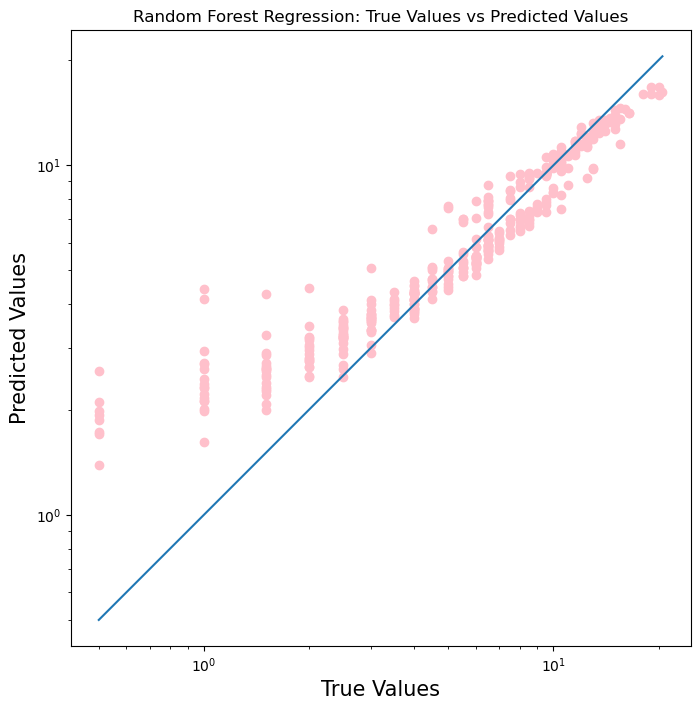

In [30]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt  

rf = RandomForestRegressor(n_estimators = 300, max_depth = None, min_samples_split = 2, min_samples_leaf = 1, random_state = 20)
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training R2 for Random Forest Regression Model: ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Testing R2 for Random Forest Regression Model: ", accuracy_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

true_val = y_train
pred_val = y_pred_train

plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='pink')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], '-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest Regression: True Values vs Predicted Values")
plt.axis('equal')
plt.show()

# Classification

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, roc_auc_score



data = pd.read_csv("Enterococcus_faecalis_Infection_Data.csv")
data = data.iloc[1:]
# data
data.dropna(inplace=True)
data["SevenDay_Death"] = data["SevenDay_Death"].astype(int)
data["ThirtyDay_Death"] = data["ThirtyDay_Death"].astype(int)
data["SixWeek_Death"] = data["SixWeek_Death"].astype(int)
data["ThreeMo_Death"] = data["ThreeMo_Death"].astype(int)
data["SixMo_Death"] = data["SixMo_Death"].astype(int)
data["NineMo_Death"] = data["NineMo_Death"].astype(int)
data["OneYear_Death"] = data["OneYear_Death"].astype(int)

data.replace(to_replace ="00-10", value = "5", inplace = True)
data.replace(to_replace ="11-20", value = "15.5", inplace = True)
data.replace(to_replace ="21-30", value = "25.5", inplace = True)
data.replace(to_replace ="31-40", value = "35.5", inplace = True)
data.replace(to_replace ="41-50", value = "45.5", inplace = True)
data.replace(to_replace ="51-60", value = "55.5", inplace = True)
data.replace(to_replace ="61-70", value = "65.5", inplace = True)
data.replace(to_replace ="71-80", value = "75.5", inplace = True)
data.replace(to_replace ="81-90", value = "85.5", inplace = True)
data.replace(to_replace ="80+", value = "80", inplace = True)

# del data['Unnamed: 0']
data = data.drop('SevenDay_Death', axis=1)
data = data.drop('ThirtyDay_Death', axis=1)
data = data.drop('SixWeek_Death', axis=1)
data = data.drop('ThreeMo_Death', axis=1)
data = data.drop('SixMo_Death', axis=1)
data = data.drop('NineMo_Death', axis=1)

y=data['OneYear_Death']
X=data.loc[:,data.columns!="OneYear_Death"]

from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=142)
x_train[x_train.isnull().any(axis=1)]


,Unnamed: 0,AGE_GRP,Charlson_WIC,Protein 1,Protein 2,Protein 3,Protein 4,Protein 5,Protein 6,Protein 7,...,Protein 2064,Protein 2065,Protein 2066,Protein 2067,Protein 2068,Protein 2069,Protein 2070,Protein 2071,Protein 2072,Protein 2073


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[183  73]
 [ 72  41]]
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       256
           1       0.36      0.36      0.36       113

    accuracy                           0.61       369
   macro avg       0.54      0.54      0.54       369
weighted avg       0.61      0.61      0.61       369

training accuracy score: 0.8672875436554133
testing accuracy score: 0.6070460704607046


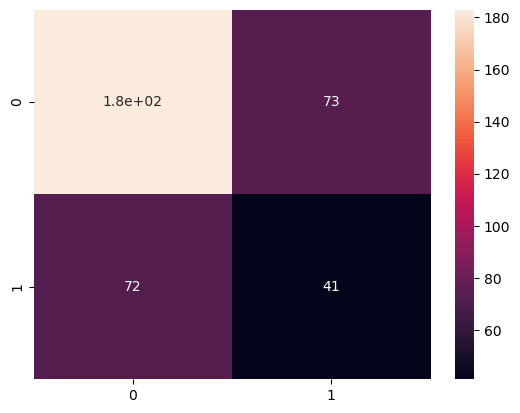

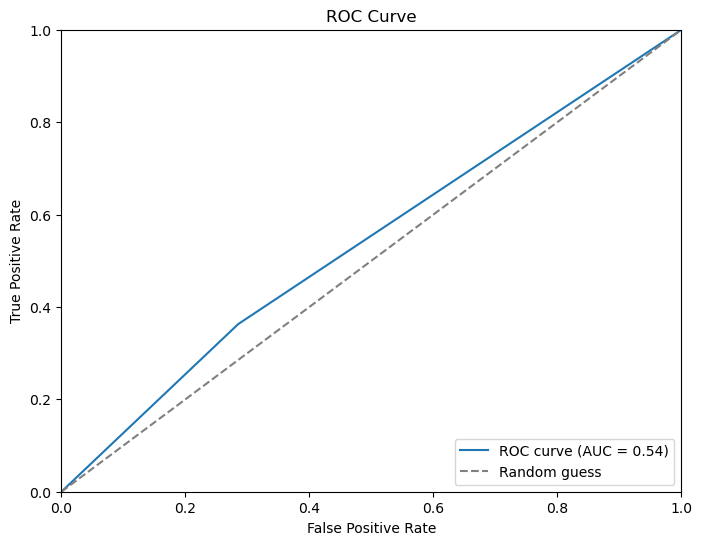

In [38]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score
lg = LogisticRegression(random_state= 40)
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)

from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

print("training accuracy score:", lg.score(x_train, y_train))
print("testing accuracy score:",lg.score(x_test, y_test))

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


[[250   6]
 [104   9]]
              precision    recall  f1-score   support

           0       0.71      0.98      0.82       256
           1       0.60      0.08      0.14       113

    accuracy                           0.70       369
   macro avg       0.65      0.53      0.48       369
weighted avg       0.67      0.70      0.61       369

training accuracy score: 1.0
testing accuracy score: 0.7018970189701897


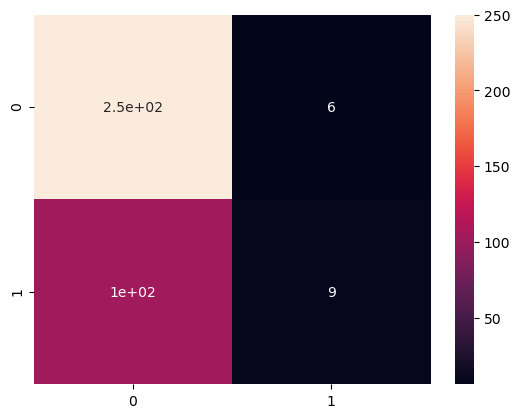

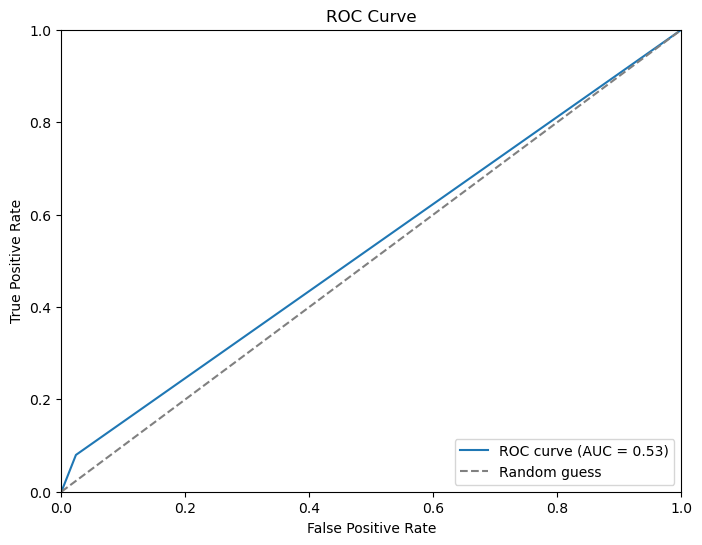

In [37]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 300, max_depth = None, min_samples_split = 2, min_samples_leaf = 1, random_state = 20
)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

from sklearn import metrics 
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test,y_pred))
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

print("training accuracy score:", rfc.score(x_train, y_train))
print("testing accuracy score:", rfc.score(x_test, y_test))


sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

[[173  83]
 [ 61  52]]
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       256
           1       0.39      0.46      0.42       113

    accuracy                           0.61       369
   macro avg       0.56      0.57      0.56       369
weighted avg       0.63      0.61      0.62       369

training accuracy score: 1.0
testing accuracy score: 0.6097560975609756


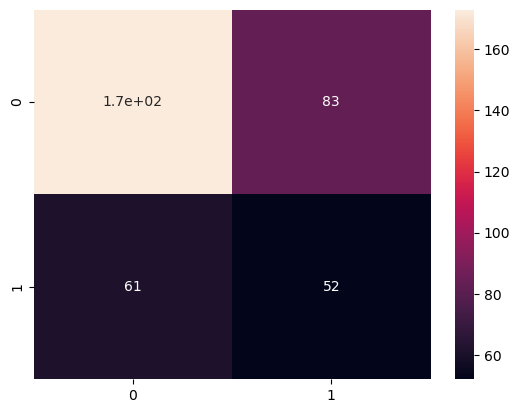

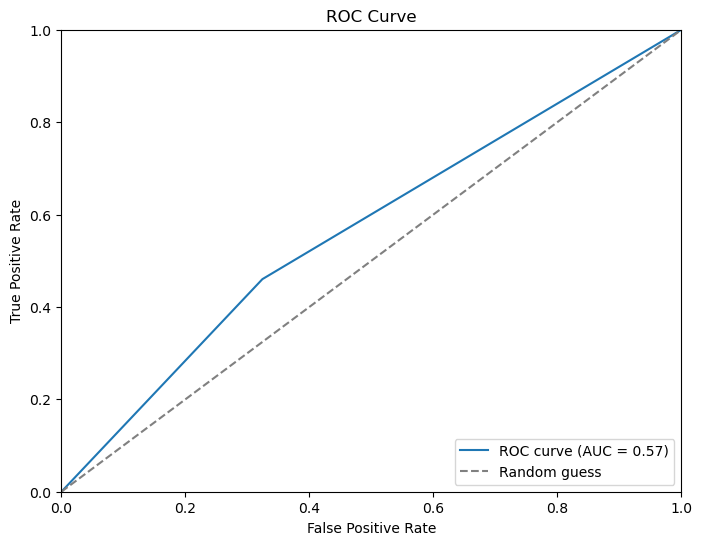

In [36]:
#Basic Trees
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=2, max_depth=40)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

from sklearn import metrics 
from sklearn.metrics import confusion_matrix, roc_curve, auc
print (confusion_matrix(y_test,y_pred))
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

print("training accuracy score:", clf.score(x_train, y_train))
print("testing accuracy score:",clf.score(x_test, y_test))

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### play

playing